# Loading & Exploring the dataset

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("/content/drive/MyDrive/csv_files/amazon_alexa.tsv", delimiter="\t")
df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [4]:
df.head()     # returns top 5 rows from dataset

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [5]:
df.sample(4)    # returns 4 random rows from dataset

,rating,date,variation,verified_reviews,feedback
994,2,29-Jul-18,Charcoal Fabric,Too difficult to set up. It keeps timing out ...,0
506,5,23-Jun-18,Black,No problems,1
820,5,30-Jul-18,Charcoal Fabric,Has great sound and is very responsive my voic...,1
2318,4,30-Jul-18,Configuration: Fire TV Stick,Fun taking to the TV. Works good. It’s a littl...,1


In [6]:
df.tail()     # returns bottom 5 rows from dataset

,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


In [7]:
print(df.shape)
print(df.index)
print(df.columns)

(3150, 5)
RangeIndex(start=0, stop=3150, step=1)
Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')


# Data Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [9]:
df.isnull().sum()

,0
rating,0
date,0
variation,0
verified_reviews,1
feedback,0


In [10]:
df.dropna(inplace = True)

In [11]:
df.isnull().sum()

,0
rating,0
date,0
variation,0
verified_reviews,0
feedback,0


In [12]:
df.duplicated().sum()

np.int64(715)

In [13]:
df.drop_duplicates(inplace = True)

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.shape

(2434, 5)

# EDA

In [16]:
df['length'] = df['verified_reviews'].apply(len)
df

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
2796,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
2797,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380
2798,4,29-Jul-18,Black Dot,Good,1,4
2799,5,29-Jul-18,Black Dot,Nice little unit no issues,1,27


In [17]:
print(df.dtypes)

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object


## Analyzing the 'rating' column

In [18]:
print(df['rating'].value_counts())
print(len(df))

rating
5    1756
4     345
1     141
3     113
2      79
Name: count, dtype: int64
2434


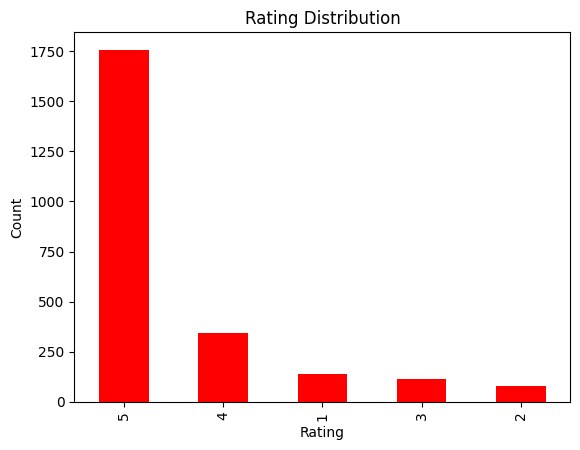

In [19]:
import matplotlib.pyplot as plt

df['rating'].value_counts().plot.bar(color = 'red')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [20]:
print(f"Rating Value count - Rating Distribution \n{round(df['rating'].value_counts() / len(df) * 100, 2)}")

Rating Value count - Rating Distribution 
rating
5    72.14
4    14.17
1     5.79
3     4.64
2     3.25
Name: count, dtype: float64


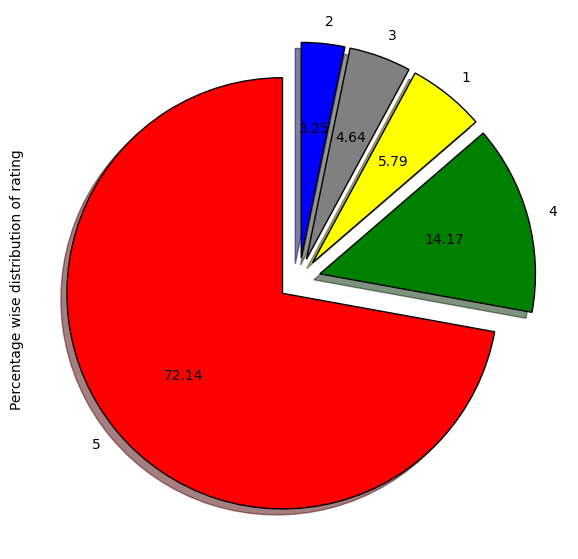

In [21]:
fig = plt.figure(figsize = (7, 7))
colors = ('red', 'green', 'yellow', 'grey', 'blue')
wp = {'linewidth' : 1, 'edgecolor' : 'black'}
tags = df['rating'].value_counts()/df.shape[0]
explode = (0.1, 0.1, 0.1, 0.1, 0.1)
tags.plot(kind = 'pie', autopct = "%1.2f", shadow = True, colors = colors, startangle = 90, wedgeprops = wp, explode = explode, label = 'Percentage wise distribution of rating')
from io import BytesIO
graph = BytesIO()
fig.savefig(graph, format = 'png')

## Analyzing the 'feedback' column

In [22]:
print("feedback value_counts\n", df['feedback'].value_counts())

feedback value_counts
 feedback
1    2214
0     220
Name: count, dtype: int64


In [23]:
review1 = df[df['feedback'] == 0].iloc[1]['verified_reviews']
review2 = df[df['feedback'] == 1].iloc[1]['verified_reviews']
print(f'review1: {review1}\nreview2: {review2}')

review1: Sound is terrible if u want good music too get a bose
review2: Loved it!


By seeing this result we can say that **1** is representing **positive feedback** & **0** is representing **negative feedback**.

We also analyze that if review is 1 or 2 then feedback is 0 & if review is 3,4 or 5 then feedback is 1.

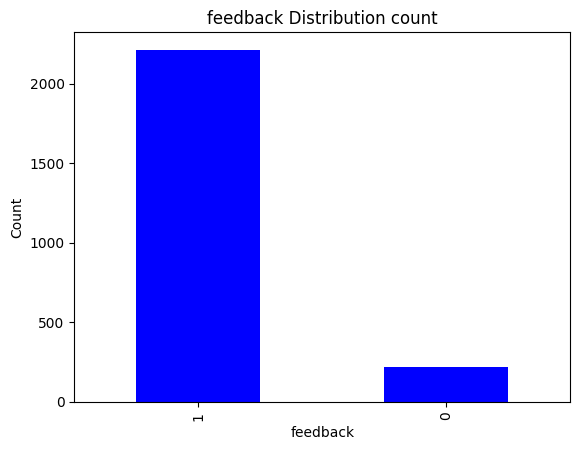

In [24]:
df['feedback'].value_counts().plot.bar(color = 'blue')
plt.title('feedback Distribution count')
plt.xlabel('feedback')
plt.ylabel('Count')
plt.show()

In [25]:
print(f"feedback %tage Distribution\n {round(df['feedback'].value_counts() / df.shape[0] * 100, 2)}")

feedback %tage Distribution
 feedback
1    90.96
0     9.04
Name: count, dtype: float64


feedback distribution
*   90.96% feedback are positive
*   9.04% feedback are negative



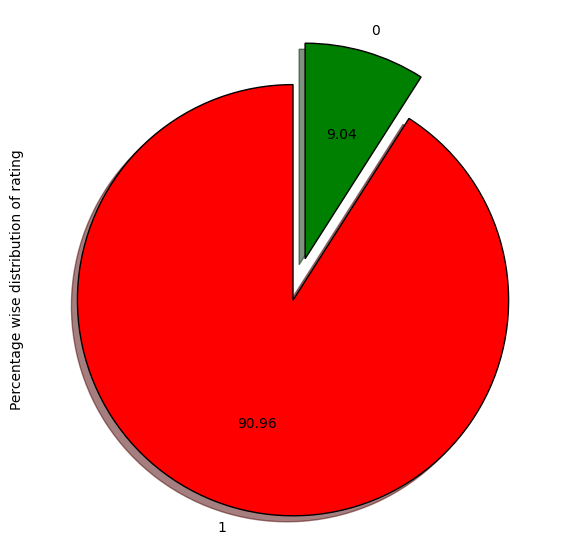

In [26]:
fig = plt.figure(figsize = (7, 7))
colors = ('red', 'green')
wp = {'linewidth' : 1, 'edgecolor' : 'black'}
tags = df['feedback'].value_counts()/df.shape[0]
explode = (0.1, 0.1)
tags.plot(kind = 'pie', autopct = "%1.2f", shadow = True, colors = colors, startangle = 90, wedgeprops = wp, explode = explode, label = 'Percentage wise distribution of rating')
from io import BytesIO
graph = BytesIO()
fig.savefig(graph, format = 'png')

In [27]:
print(df[df['feedback'] == 0]['rating'].value_counts())

rating
1    141
2     79
Name: count, dtype: int64


In [28]:
print(df[df['feedback'] == 1]['rating'].value_counts())

rating
5    1756
4     345
3     113
Name: count, dtype: int64


## Analyzing the 'variation' column

In [29]:
print("Variation value_counts: ")
print(df['variation'].value_counts())

Variation value_counts: 
variation
Configuration: Fire TV Stick    342
Black  Plus                     270
Black                           261
Black  Show                     260
Black  Dot                      252
Black  Spot                     241
Charcoal Fabric                 219
White  Spot                     108
White  Dot                       92
White                            90
White  Show                      85
Heather Gray Fabric              79
White  Plus                      78
Sandstone Fabric                 45
Oak Finish                        7
Walnut Finish                     5
Name: count, dtype: int64


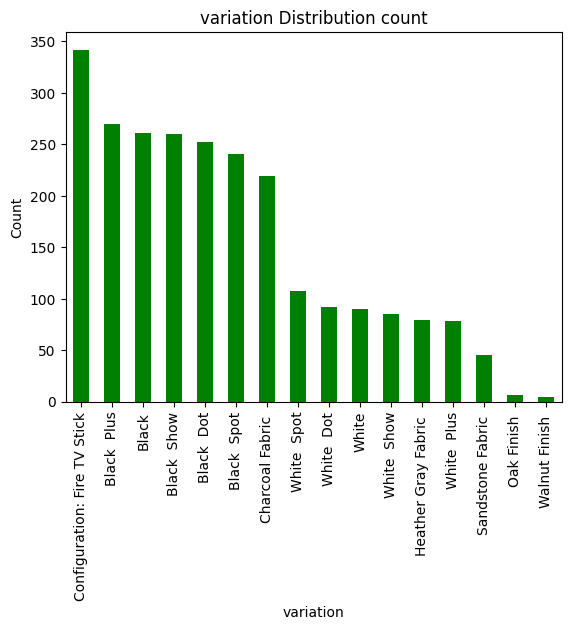

In [30]:
df['variation'].value_counts().plot.bar(color = 'green')
plt.title('variation Distribution count')
plt.xlabel('variation')
plt.ylabel('Count')
plt.show()

In [31]:
print(f"Variation %tage distribution\n {round(df['variation'].value_counts() / df.shape[0] * 100, 2)}")

Variation %tage distribution
 variation
Configuration: Fire TV Stick    14.05
Black  Plus                     11.09
Black                           10.72
Black  Show                     10.68
Black  Dot                      10.35
Black  Spot                      9.90
Charcoal Fabric                  9.00
White  Spot                      4.44
White  Dot                       3.78
White                            3.70
White  Show                      3.49
Heather Gray Fabric              3.25
White  Plus                      3.20
Sandstone Fabric                 1.85
Oak Finish                       0.29
Walnut Finish                    0.21
Name: count, dtype: float64


In [32]:
# fig = plt.figure(figsize = (5,5))
# colors = ('red', 'green', 'yellow', 'grey', 'blue', 'purple', 'violet', 'white', 'black', 'brown', 'red', 'green', 'yellow', 'grey', 'blue', 'red')
# wp = {'linewidth' : 1, 'edgecolor' : 'black'}
# tags = df['variation'].value_counts()/df.shape[0]
# explode = (0.1, 0.1, 0.1, 0.1, 0.1,0.1, 0.1, 0.1, 0.1, 0.1,0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
# tags.plot(kind = 'pie', autopct = "%1.2f", shadow = True, colors = colors, startangle = 90, wedgeprops = wp, explode = explode, label = 'Percentage wise distribution of rating')
# from io import BytesIO
# graph = BytesIO()
# fig.savefig(graph, format = 'png')

In [33]:
# print(f"variation value_counts when feedback = 0\n {df[df['feedback'] == 0]['variation'].value_counts()}\n\n")
# print(f"variation value_counts when feedback = 1\n {df[df['feedback'] == 1]['variation'].value_counts()}")

In [34]:
# print(f"Variation when rating = 1 or 2\n\n {df[((df['rating'] == 1) | (df['rating'] == 2))]['variation'].value_counts()}\n\n")
# print(f"Variation when rating = 3 or 4 or 5\n\n {df[((df['rating'] == 3) | (df['rating'] == 4) | (df['rating'] == 5))]['variation'].value_counts()}\n\n")

In [35]:
print(df.groupby('variation')['rating'].mean())

variation
Black                           4.233716
Black  Dot                      4.452381
Black  Plus                     4.370370
Black  Show                     4.480769
Black  Spot                     4.311203
Charcoal Fabric                 4.735160
Configuration: Fire TV Stick    4.590643
Heather Gray Fabric             4.696203
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.800000
White                           4.166667
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.342593
Name: rating, dtype: float64


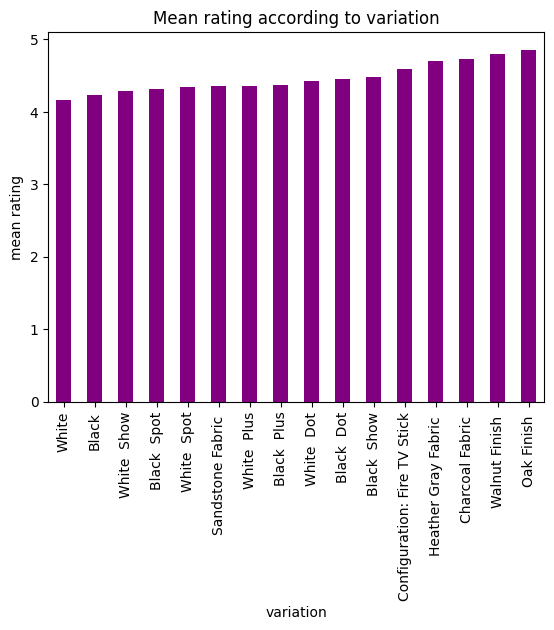

In [36]:
df.groupby('variation')['rating'].mean().sort_values().plot.bar(color = 'purple')
plt.title('Mean rating according to variation')
plt.xlabel('variation')
plt.ylabel('mean rating')
plt.show()

## Analyzing the 'verified_reviews' column

In [37]:
df['length'].describe()

,length
count,2434.000000
mean,137.954396
std,192.418052
min,1.000000
25%,31.000000
50%,77.000000
75%,170.750000
max,2851.000000


Length analysis for full dataset

[Text(0.5, 1.0, 'Distribution of length of review')]

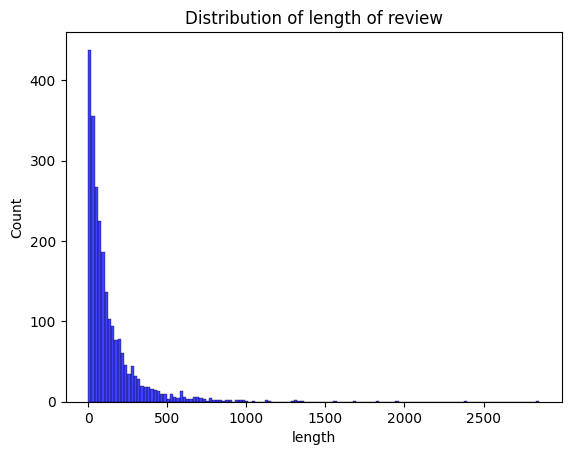

In [38]:
import seaborn as sns
sns.histplot(df['length'], color = 'blue').set(title = 'Distribution of length of review')

[Text(0.5, 1.0, 'Distribution of length of review when feedback = 0')]

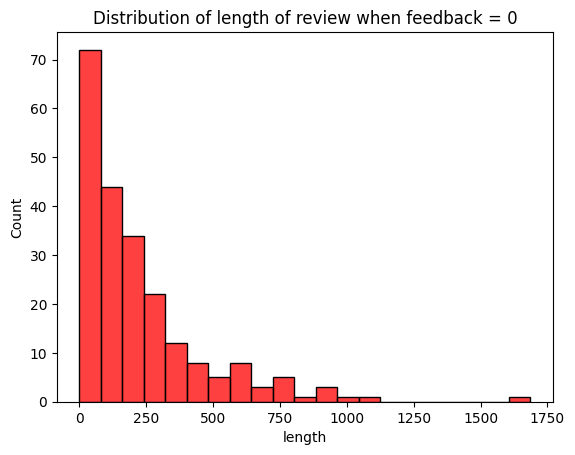

In [39]:
sns.histplot(df[df['feedback'] == 0]['length'], color = 'red').set(title = 'Distribution of length of review when feedback = 0')

[Text(0.5, 1.0, 'Distribution of length of review when feedback = 1')]

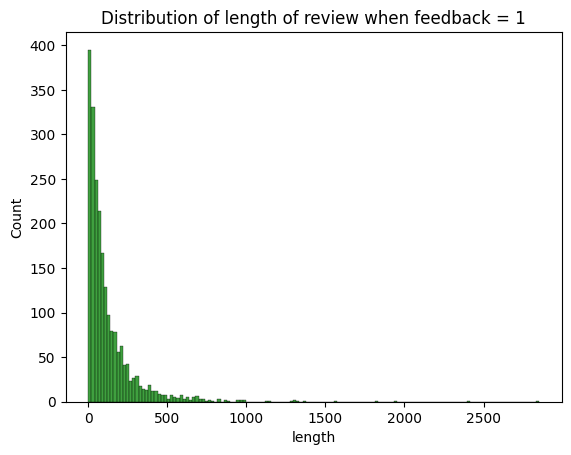

In [40]:
sns.histplot(df[df['feedback'] == 1]['length'], color = 'green').set(title = 'Distribution of length of review when feedback = 1')

Lenght wise mean rating

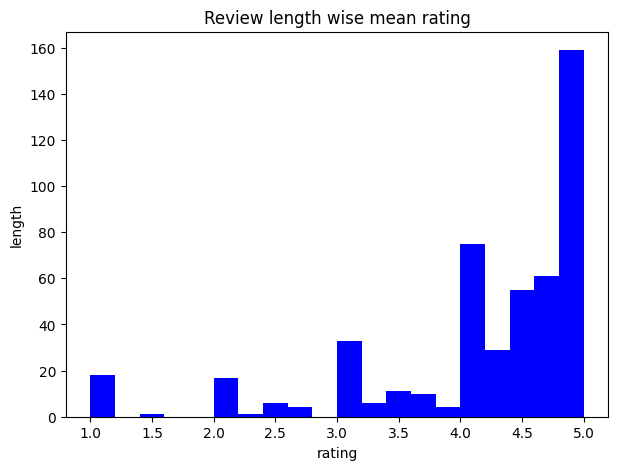

In [41]:
df.groupby('length')['rating'].mean().plot.hist(color = 'blue', figsize = (7,5), bins = 20)
plt.title('Review length wise mean rating')
plt.xlabel('rating')
plt.ylabel('length')
plt.show()

# Data Preprocessing

In [42]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

# STOPWORDS = set(stopwords.words('english'))
# from nltk.stem.porter import PorterStemmer




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

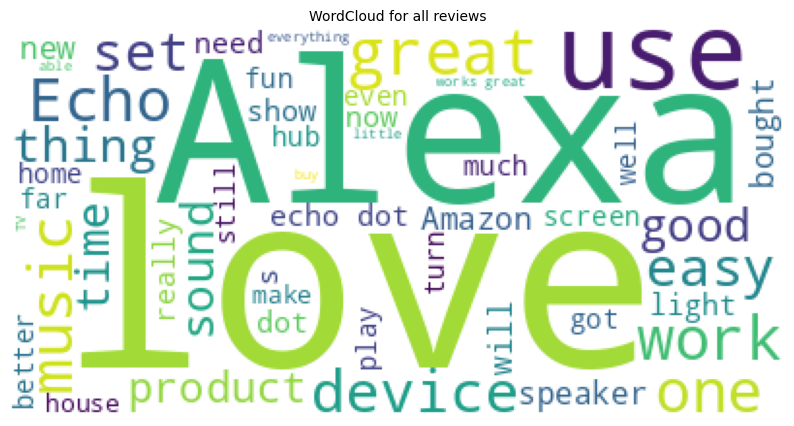

In [43]:
from wordcloud import WordCloud
wc = WordCloud(background_color = 'white', max_words = 50)

reviews = "".join(review for review in df['verified_reviews'])
plt.figure(figsize = (10,10))
plt.imshow(wc.generate(reviews))
plt.title("WordCloud for all reviews", fontsize = 10)
plt.axis('off')
plt.show()

In [44]:
negative_reviews = "".join(review for review in df[df['feedback'] == 0]['verified_reviews'])
negative_reviews = negative_reviews.lower().split()

positive_reviews = "".join(review for review in df[df['feedback'] == 1]['verified_reviews'])
positive_reviews = positive_reviews.lower().split()

unique_negative = [x for x in negative_reviews if x not in positive_reviews]
unique_negative = " ".join(unique_negative)
unique_positive = [x for x in positive_reviews if x not in negative_reviews]
unique_positive = " ".join(unique_positive)

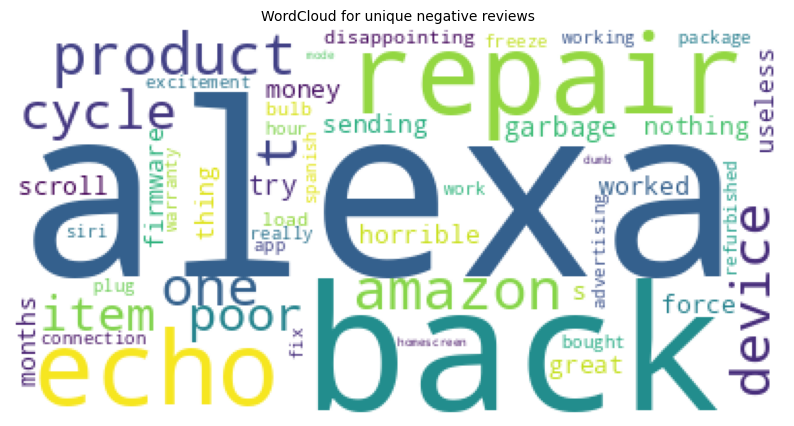

In [45]:
wc = WordCloud(background_color = 'white', max_words = 50)
plt.figure(figsize = (10,10))
plt.imshow(wc.generate(unique_negative))
plt.title("WordCloud for unique negative reviews", fontsize = 10)
plt.axis('off')
plt.show()

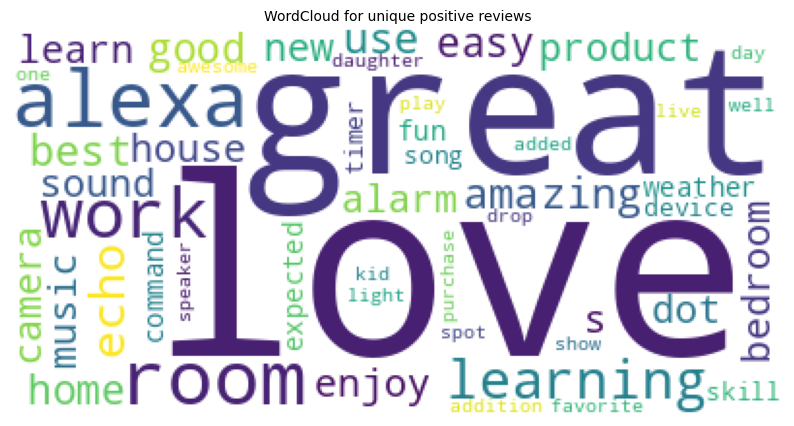

In [46]:
wc = WordCloud(background_color = 'white', max_words = 50)
plt.figure(figsize = (10,10))
plt.imshow(wc.generate(unique_positive))
plt.title("WordCloud for unique positive reviews", fontsize = 10)
plt.axis('off')
plt.show()

# Data Modeling

In [47]:
from nltk.stem.porter import PorterStemmer
import re
corpus = []
stemmer = PorterStemmer()

for i in range(0,len(df)):
  review = re.sub('[^a-zA-Z]', ' ', df.iloc[i]['verified_reviews'])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if word not in stopwords.words('english')]
  review = " ".join(review)
  corpus.append(review)

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = 'english', max_features = 2500)

X = cv.fit_transform(corpus).toarray()
y = df['feedback'].values

In [49]:
import pickle
pickle.dump(cv, open('cv_vectorizer.pkl', 'wb'))

In [50]:
print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')

Shape of X: (2434, 2500)
Shape of y: (2434,)


In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [52]:
print(f"X train shape: {X_train.shape}")
print(f"y train shape: {y_train.shape}")
print(f"X test shape: {X_test.shape}")
print(f"y test shape: {y_test.shape}")

X train shape: (1703, 2500)
y train shape: (1703,)
X test shape: (731, 2500)
y test shape: (731,)


In [53]:
print(X_train.max())
print(X_test.max())

10
12


In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [55]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))

## Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train_scaler, y_train)

RandomForestClassifier()

In [57]:
print("Training Accuracy :", model_rf.score(X_train_scaler, y_train))
print("Testing Accuracy :", model_rf.score(X_test_scaler, y_test))

Training Accuracy : 0.991779213153259
Testing Accuracy : 0.9138166894664843


In [58]:
y_predict = model_rf.predict(X_test_scaler)

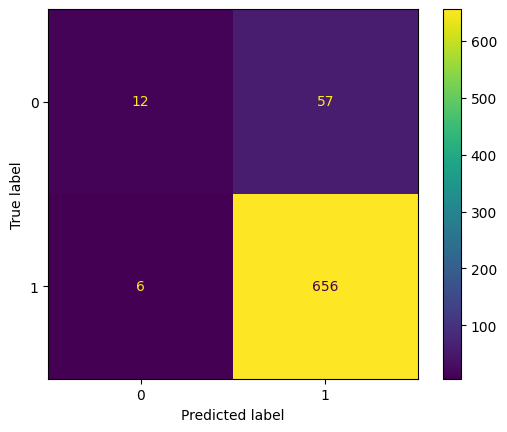

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_predict)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model_rf.classes_)
# plt.figure(figsize = (1,1))
cm_display.plot()
plt.show()

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_predict))
print("Precision:", precision_score(y_test, y_predict))
print("Recall:", recall_score(y_test, y_predict))
print("F1 Score:", f1_score(y_test, y_predict))

Accuracy: 0.9138166894664843
Precision: 0.9200561009817672
Recall: 0.9909365558912386
F1 Score: 0.9541818181818181


In [61]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model_rf, X = X_train_scaler, y = y_train, cv = 10)

print('Accuracy: ', accuracies.mean())
print('Standard Deviation: ', accuracies.std())

Accuracy:  0.9213175094599244
Standard Deviation:  0.009161080737872815


In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

params = {
    'bootstrap' : [True],
    'max_depth' : [80, 100],
    'min_samples_split' : [8, 12],
    'n_estimators' : [100, 300]
}

cv_object = StratifiedKFold(n_splits = 2)

grid_search = GridSearchCV(estimator = model_rf, param_grid = params, cv = cv_object, verbose = 0, return_train_score = True)
grid_search.fit(X_train_scaler, y_train.ravel())

print("Best Parameter Combination : {}".format(grid_search.best_params_))

Best Parameter Combination : {'bootstrap': True, 'max_depth': 100, 'min_samples_split': 8, 'n_estimators': 300}


In [64]:
print("Cross validation mean accuracy on train set : {}".format(grid_search.cv_results_['mean_train_score'].mean()*100))
print("Cross validation mean accuracy on test set : {}".format(grid_search.cv_results_['mean_test_score'].mean()*100))
print("Accuracy score for test set :", accuracy_score(y_test, y_predict))

Cross validation mean accuracy on train set : 96.66020506115423
Cross validation mean accuracy on test set : 91.36817083464358
Accuracy score for test set : 0.9138166894664843


## XG Boost

In [65]:
from xgboost import XGBClassifier

In [66]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train_scaler, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [67]:
print("Training Accuracy :", model_xgb.score(X_train_scaler, y_train))
print("Testing Accuracy :", model_xgb.score(X_test_scaler, y_test))

Training Accuracy : 0.9647680563711099
Testing Accuracy : 0.9042407660738714


In [68]:
y_predict = model_xgb.predict(X_test)

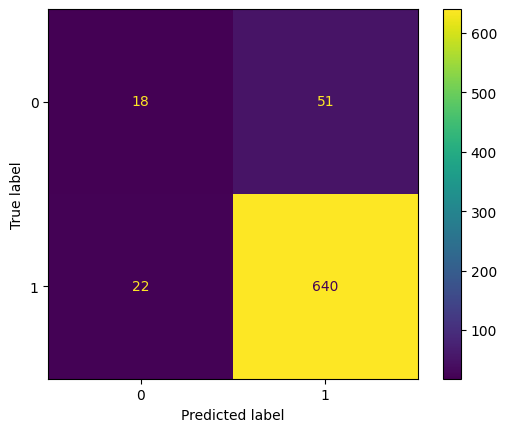

In [69]:
cm = confusion_matrix(y_test, y_predict)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model_rf.classes_)
# plt.figure(figsize = (1,1))
cm_display.plot()
plt.show()

In [70]:
print("Accuracy:", accuracy_score(y_test, y_predict))
print("Precision:", precision_score(y_test, y_predict))
print("Recall:", recall_score(y_test, y_predict))
print("F1 Score:", f1_score(y_test, y_predict))

Accuracy: 0.9001367989056087
Precision: 0.9261939218523878
Recall: 0.9667673716012085
F1 Score: 0.9460458240946046


In [71]:
pickle.dump(model_xgb, open('model_xgb.pkl', 'wb'))

## Decision Tree Algorithm

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_scaler, y_train)

DecisionTreeClassifier()

In [75]:
print("Training Accuracy :", model_dt.score(X_train_scaler, y_train))
print("Testing Accuracy :", model_dt.score(X_test_scaler, y_test))

Training Accuracy : 0.991779213153259
Testing Accuracy : 0.8837209302325582


In [76]:
y_predict = model_dt.predict(X_test)

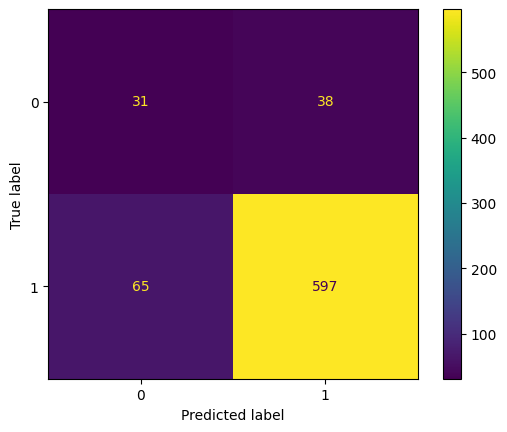

In [77]:
cm = confusion_matrix(y_test, y_predict)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model_rf.classes_)
# plt.figure(figsize = (1,1))
cm_display.plot()
plt.show()

In [78]:
print("Accuracy:", accuracy_score(y_test, y_predict))
print("Precision:", precision_score(y_test, y_predict))
print("Recall:", recall_score(y_test, y_predict))
print("F1 Score:", f1_score(y_test, y_predict))

Accuracy: 0.8590971272229823
Precision: 0.9401574803149606
Recall: 0.9018126888217523
F1 Score: 0.920585967617579


In [82]:
pickle.dump(model_dt, open('model_dt.pkl', 'wb'))